# Cournot Competition with and without Collusion


In this notebook, we work with two competing firms operating under Cournot competition known from Micro II, Micro III and Industrial Organization. First, we solve the simple standard model and afterwards we looke into what happens when the model is extended so that the firms collude.

## Cournot Competition


When firms compete in quantities, we have Cournot competition. In this notebook we stick to the simplest setup with two firms, i.e. we have a duopoly. The two firms simultaneously decide their output, and since the two firms have market power, the chosen quantities will determine the price. Both firms seek to maximize their profit given the decision of the other firm. The Cournot model can be extended in different ways. In this notebook we will look into what happens when firms collude, meaning that the two firms agree on a specific strategy.

## The Standard Model

### General Assumptions

The two firms produce a homogeneous product, and thus the consumers see them as perfect substitutes.

The two firms have the same costs, which are $c(q)$, and the marginal costs are constant and equal to c, i.e. $mc = c$.

The two firms are facing the same overall demand from consumers.

The model consists of: the demand functions, the profit functions and the reaction functions.

### The Demand Function

Firm 1 produces and amount equal to $q_1$, whereas firm 2 produces $q_2$. The total demand in the economy is represented by the sum of each firm's individual supply, and is thus: 

$$Q = q_1+q_2$$

The inverse linear demand function is given by 

$$p = a - b(q_1+q_2)$$

where $a$ and $b$ are positive parameters.

### The Profit Function

The profit function is total revenue less total costs. The price is linear, and more of both goods decreases the price.

$$\pi_1=pq_1-cq_1$$

where $p$ is given above as the inverse demand function. 

If we plug in the expression for $p$, we can rewrite the profit function and get:

$$\pi_1=[a-b(q_1+q_2)]q_1-cq_1$$

As the two firms are symmetric, the profit for firm 2 will be equivalent.

Notice that the profit of firm one depends on the amount of goods company two produces.

### The Reaction Function

The reaction functions show how much each firm produces given the other firms output.

To find the reaction functions, we optimize the profit function for firm 1 with respect to the quantity $q_1$:

\begin{equation*}
\begin{aligned}
\frac{\partial \pi_1}{\partial q_1} = a -2bq_1-bq_2-c = 0
\end{aligned}
\end{equation*}

We solve for $q_1$ to get the reaction function of firm 1:

$$q_1(q_2)=\frac{1}{2}\left[\frac{(a-c)}{b}-q_2\right]$$

As the two firms are symmetric, firm 2's reaction function is equivalent.

Notice that the higher the quantity of firm 2, the lower the quantity of firm 1.

### Cournot-Nash Equilibrium

Solving the model gives us the Cournot-Nash equilibrium. Here, firm 1 produces the optimal amount of the good given what firm 2 produces and vice verca.

To find the Cournot-Nash Equilibrium, we consider the two **reaction functions**. We plug in $q_2$ in $q_1$ and solve for $q_1$:

$$q_1 = \frac{1}{2}\left[\frac{(a-c)}{b}-\left[\frac{1}{2}\left[\frac{(a-c)}{b}-q_1\right]\right]\right]$$
$$q_1=\frac{1}{3}\frac{(a-c)}{b}$$

As the two companies are symmetric, $q_2$ is:

$$q_2=\frac{1}{3}\frac{(a-c)}{b}$$

Which is the solution to the model. This gives us a price of:

$$p = a - b(\frac{1}{3}\frac{(a-c)}{b}+\frac{1}{3}\frac{(a-c)}{b}) = \frac{1}{3}a + \frac{2}{3}c$$

And a firm profit of:

$$\pi_i = pq_i-cq_i = \frac{(a + 2c)}{3}\frac{(a - c)}{3b} + c\frac{(a - c)}{3b} = \frac{a^2 + 4ac - 5c^2}{9b}$$

Now, we will solve the model using Python.

## Solving the Cournot model using Python

First, we import the relevant libraries. We will be be solving the model both symbolically and numerically, meaning that we need the sympy library and elements from the scipy library. Furthermore, we need numpy when working with arrays and matplotlib and ipywidgets for graphs.

In [2]:
from scipy import optimize,arange
import numpy as np
import ipywidgets as widgets
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

## Symbolically

First, we define all the symbols and make sure that the results will look nice when printed.

In [14]:
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
pi1 = sm.symbols('pi1')
pi2 = sm.symbols('pi2')
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')

sm.init_printing(use_unicode=True) # for pretty printing

Then we set up the inverse demand function.

In [81]:
def p(q1,q2):
    return a-b*(q1+q2)

And the cost function.

In [82]:
def cost(c,q):
    return c*q

We can now define the profit function.

In [83]:
def profit(q1,q2,c):
    return p(q1,q2)*q1 - cost(q1,c)

And then we can differentiate to find the reaction functions. We see that they are the same as found in the section above.

In [84]:
foc1 = sm.diff(profit(q1,q2,c),q1)
foc2 = sm.diff(profit(q2,q1,c),q2)
foc1

Finally, we can solve for the equilibrium output.

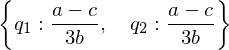

In [21]:
sm.solve([foc1, foc2], [q1, q2])

**Jeg ved ikke, om vi skal løse for pris og profit her også?**

## Numerically

We again define all the functions, but this time as python variables, and since we are solving the model numerically now, we also define the demand parameters and the marginal costs.

In [85]:
def p(q1,q2):
    return a-b*(q1+q2)

def cost(q,c):
    c*q

def profit(demand_function,cost_function,c,q1,q2):
    return demand_function(q1,q2)*q1-cost(q1,c)

a = 2
b = 1
c = 0

We then need to maximize profits in order to find the reaction function as shown in the theoretical section above. We will use scipy.optimize for this, and since this function is minimizing instead of maximizing, we add a minus in front.

In [80]:
def reaction_function(q2,c):
    q1 =  optimize.minimize(lambda x: -profits(p,c,x,q2),0,1)
    return q1[0]

def fixed_point(q,c):
    return [q[0]-reaction_function(q[1],c[0]),q[1]-reaction_function(q[0],c[1])]

initial_guess = [0,0]

optimize.fsolve(lambda q: fixed_point(q,[0,0]), initial_guess)

# Jeg forstår ikke helt, hvad der sker her. Lad os tale om det i morgen.

TypeError: <lambda>() takes 1 positional argument but 2 were given

#### The Profit function in python:

In [13]:
profit1 = q1*p1-q1*c
profit1

-c*q_1 + p_1*q_1

There are **three steps** to solve this:
1. **Plug in** the inverse demand function in the profit function.
2. **Differentiate** the profit function with respect to q1.
3. **Set equal to zero and solve for q1** to get the reaction function.
4. **Define q2**.
5. **Plug in** q2 in the reaction function for firm 1.
6. **Solve for** q1.

**Step 1: Plug in (substitute) $p_1$ to $\pi_1$**

In [14]:
profit1_subs = profit1.subs(p1,inverse_demand1)
profit1_subs

-c*q_1 + q_1*(a - b*(q_1 + q_2))

**Step 2: Differentiate with respect to q1**

In [15]:
foc1 = sm.diff(profit1_subs,q1)
foc1

a - b*q_1 - b*(q_1 + q_2) - c

**Step 3: Set equal to zero and solve for q1**

In [16]:
sol = sm.solve(sm.Eq(foc1,0),q1)
sol

[(a - b*q_2 - c)/(2*b)]

The above function is the reaction functionf for firm 1, depending on how much firm 1 produces: 
$$sol = q_1=\frac{a-bq_2-c}{2*b}$$
Hence we still need to plug in q2 and solve for q1.
As the firms are symmetric, we can now define $q_2$ as follows:

**Jeg kan ikke helt finde ud af, hvordan vi gør med at få sat q2 ind i her fra... Det virker ikke til, at man bare kan definere q2, som jeg har forsøgt med nedenfor, også substituere dette ind, selvom det ellers, ville give mening for mig. Tænker helt sikkert, der må være en måde man kan gøre det.**

**Step 4: Define q2**

In [17]:
q2 = (a - b*q1 - c)/(2*b)
q2

(a - b*q_1 - c)/(2*b)

**Step 5: Plug in (substitute) q2 in sol:**

In [18]:
sol_subs = sol.subs(q2,sol)
sol_subs

AttributeError: 'list' object has no attribute 'subs'